- from dataset, readme 
- 연습 내용 중 하나 제안만 선택해 분석
- 결측치나 이상치는 분석가 판단해 처리
- 공통 주제 제안 4

1. 동일한 시기에 동일한 차종(product)을 선택했다고 했을 때, 
2. 사람들이 금액을 얼만큼(amount)/(Term)을 사용했는지 최대와 미니멈, 그리고 평균을 확인 할 수 있게, 
3. 또한 차종별 가장 많은 돈을 쓴 비율에 많은 세대와 반대로 적은 돈을 쓴 세대는 어디인지? 확인하기
4. 특정한 세대를 통해 다른 데이터들의 상관관계 분석후 +1에 가까운 컬럼을 통해 전략 세우기 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic)

plt.rc('font', family='NanumGothic')  # 나눔고딕 폰트 사용
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
rentAcar = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
rentAcar.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


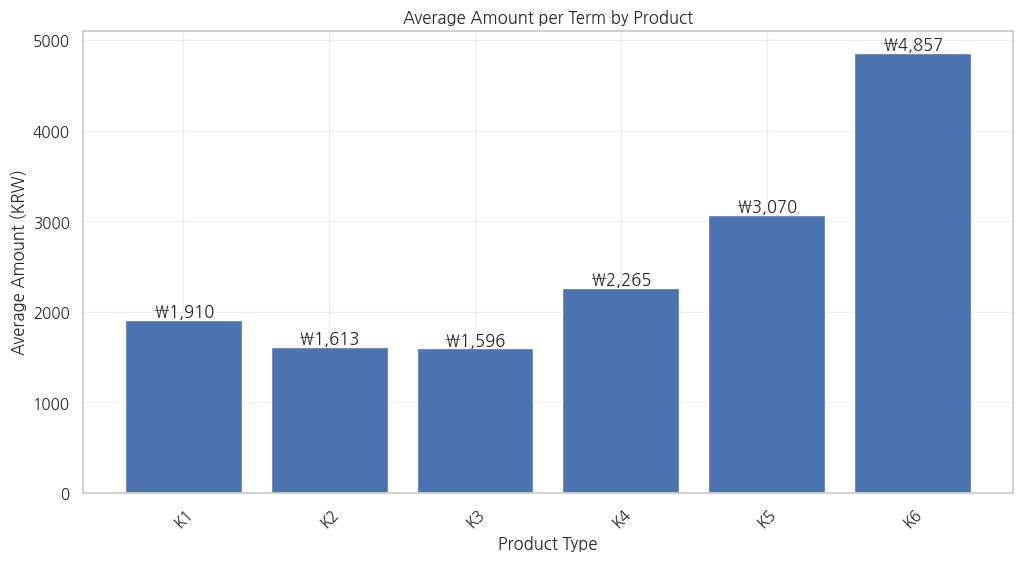

/tmp/ipykernel_521/3856796823.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_mean = rentAcar.groupby(['age_group', 'product'])['amount_per_term'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

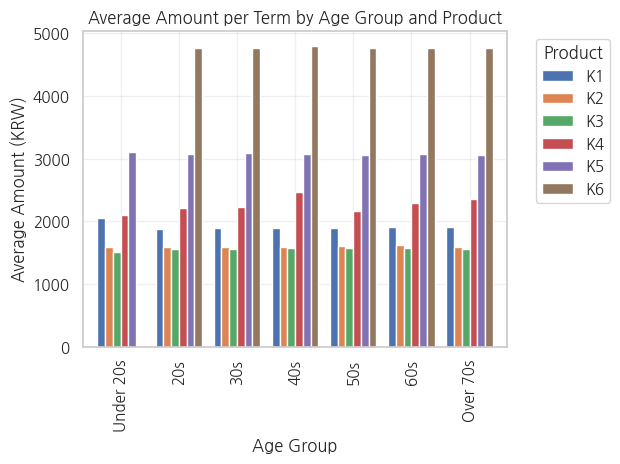

<Figure size 1200x600 with 0 Axes>

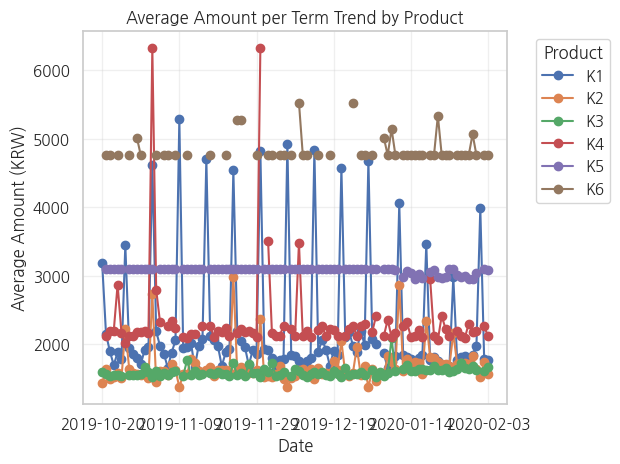

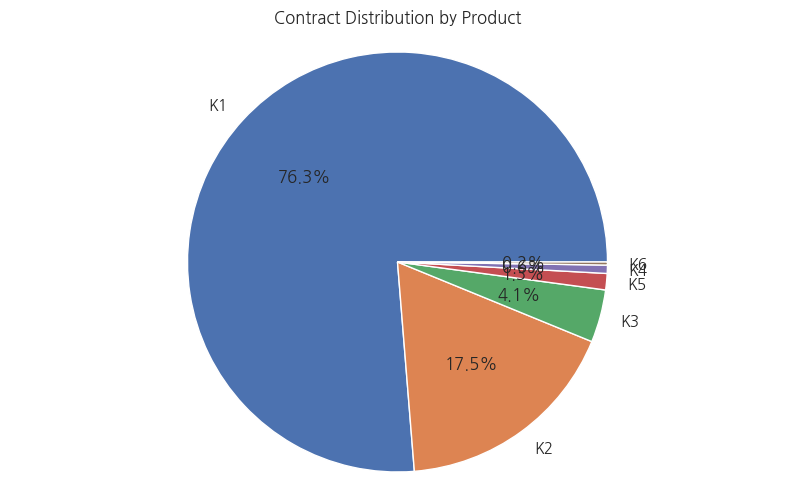

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. 차종별 Term당 평균 금액 막대 그래프
plt.figure(figsize=(12, 6))
rentAcar['amount_per_term'] = rentAcar['amount'] / rentAcar['Term']
product_stats = rentAcar.groupby('product')['amount_per_term'].agg(['mean', 'count']).reset_index()
bars = plt.bar(product_stats['product'], product_stats['mean'])

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'₩{int(height):,}',
             ha='center', va='bottom')

plt.title('Average Amount per Term by Product')
plt.xlabel('Product Type')
plt.ylabel('Average Amount (KRW)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 2. 연령대와 차종의 관계를 보여주는 그래프
plt.figure(figsize=(12, 6))

# 연령대 그룹 생성
rentAcar['age_group'] = pd.cut(rentAcar['age'], 
                              bins=[0, 20, 30, 40, 50, 60, 70, 100],
                              labels=['Under 20s', '20s', '30s', '40s', '50s', '60s', 'Over 70s'])

age_product_mean = rentAcar.groupby(['age_group', 'product'])['amount_per_term'].mean().unstack()

# 그래프 그리기
age_product_mean.plot(kind='bar', width=0.8)
plt.title('Average Amount per Term by Age Group and Product')
plt.xlabel('Age Group')
plt.ylabel('Average Amount (KRW)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 시계열 트렌드
plt.figure(figsize=(12, 6))
time_trend = rentAcar.groupby(['datetime', 'product'])['amount_per_term'].mean().unstack()
time_trend.plot(marker='o')
plt.title('Average Amount per Term Trend by Product')
plt.xlabel('Date')
plt.ylabel('Average Amount (KRW)')
plt.grid(True, alpha=0.3)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 4. 계약 건수 분포
plt.figure(figsize=(10, 6))
contract_counts = rentAcar['product'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%')
plt.title('Contract Distribution by Product')
plt.axis('equal')
plt.show()



차종별 Term당 금액 통계:
        amount_per_term                         
                   mean      min      max  count
product                                         
K1              1910.73  1365.00  8575.00  39134
K2              1613.58  1215.00  5575.00   8995
K3              1596.10  1515.00  3525.00   2082
K4              2265.73  2015.00  6325.00    327
K5              3070.42  2792.31  3253.85    645
K6              4857.69  4761.54  5530.77    120
nan             1615.00  1615.00  1615.00      1

연령대별 Term당 금액 통계:
               amount_per_term                       
                          mean     min     max  count
temp_age_group                                       
100대                   2465.56  1515.0  5575.0      6
20대                    1826.26  1315.0  8050.0   4239
30대                    1846.31  1315.0  8050.0   8838
40대                    1842.61  1215.0  8575.0  11099
50대                    1852.79  1215.0  8050.0   9218
60대                    1865.21  1315.0  8

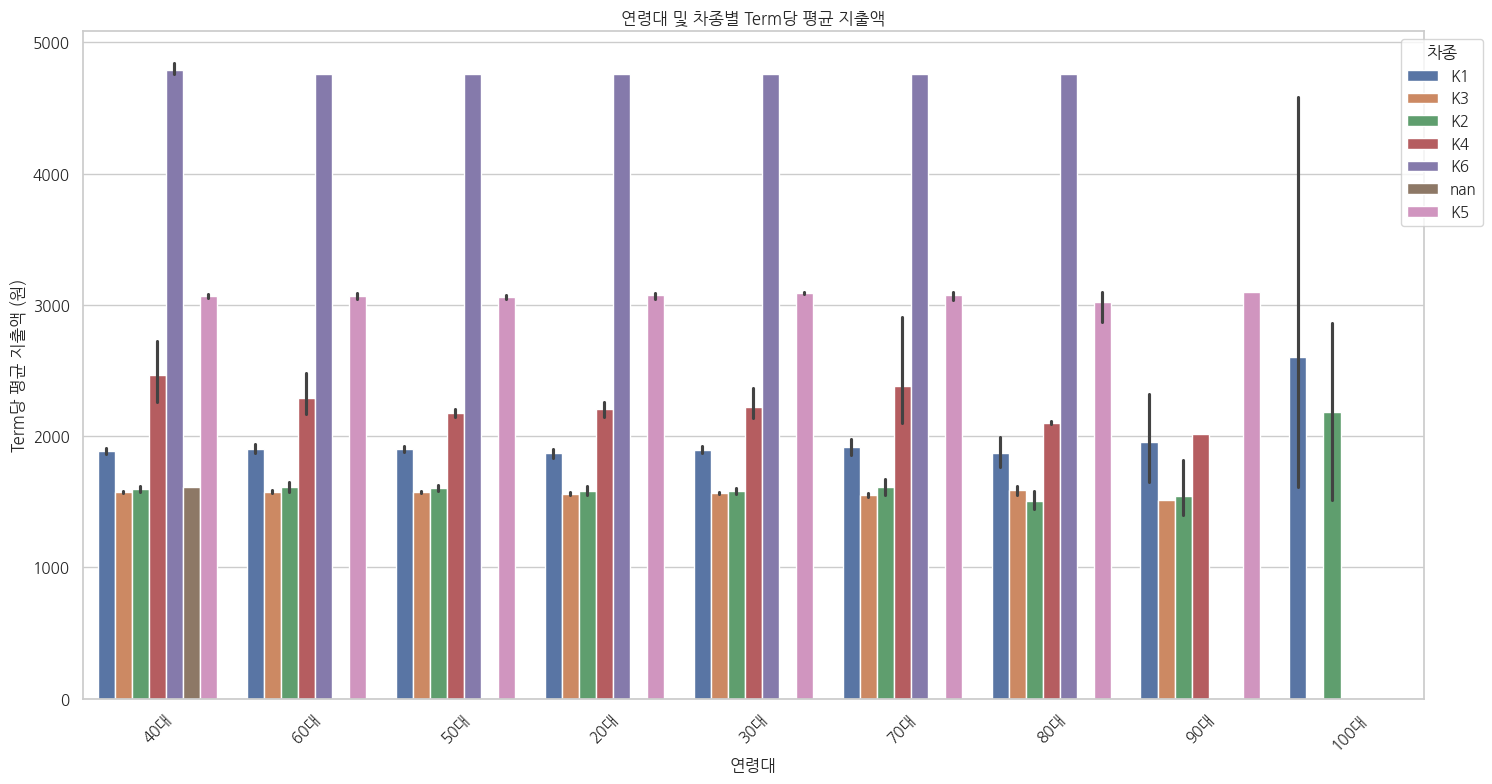

In [51]:


# 1. 데이터 전처리 함수
def get_age_group(age):
    if pd.isna(age) or age == 'Unknown':
        return 'Unknown'
    age = int(float(age))
    return f"{(age//10)*10}대"

# 2. 데이터 처리
rentAcar['product'] = rentAcar['product'].astype(str)
rentAcar['temp_age_group'] = rentAcar['age'].apply(get_age_group)
rentAcar['amount_per_term'] = rentAcar['amount'] / rentAcar['Term']

# 3. 차종별 통계
product_stats = rentAcar.groupby('product').agg({
    'amount_per_term': ['mean', 'min', 'max', 'count']
}).round(2)

print("\n차종별 Term당 금액 통계:")
print("="*50)
print(product_stats)

# 4. 연령대별 통계
age_stats = rentAcar[rentAcar['temp_age_group'] != 'Unknown'].groupby('temp_age_group').agg({
    'amount_per_term': ['mean', 'min', 'max', 'count']
}).round(2)

print("\n연령대별 Term당 금액 통계:")
print("="*50)
print(age_stats)

# 5. 각 차종별 상위/하위 25% 연령대 분포 분석
for product in rentAcar['product'].unique():
    product_data = rentAcar[rentAcar['product'] == product]
    
    print(f"\n{product} 차종 분석:")
    print("="*50)
    
    # Term당 amount 기준으로 상위/하위 25% 구분
    top_25_mask = product_data['amount_per_term'] >= product_data['amount_per_term'].quantile(0.75)
    bottom_25_mask = product_data['amount_per_term'] <= product_data['amount_per_term'].quantile(0.25)
    
    # 연령대별 분포 계산
    top_25_age_dist = product_data[top_25_mask]['temp_age_group'].value_counts(normalize=True) * 100
    bottom_25_age_dist = product_data[bottom_25_mask]['temp_age_group'].value_counts(normalize=True) * 100
    
    print("\n상위 25% 연령대 분포 (%):")
    print(top_25_age_dist.round(2))
    print("\n하위 25% 연령대 분포 (%):")
    print(bottom_25_age_dist.round(2))

# 6. 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=rentAcar[rentAcar['temp_age_group'] != 'Unknown'], 
            x='temp_age_group', y='amount_per_term', hue='product')
plt.title('연령대 및 차종별 Term당 평균 지출액')
plt.xlabel('연령대')
plt.ylabel('Term당 평균 지출액 (원)')
plt.xticks(rotation=45)
plt.legend(title='차종', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


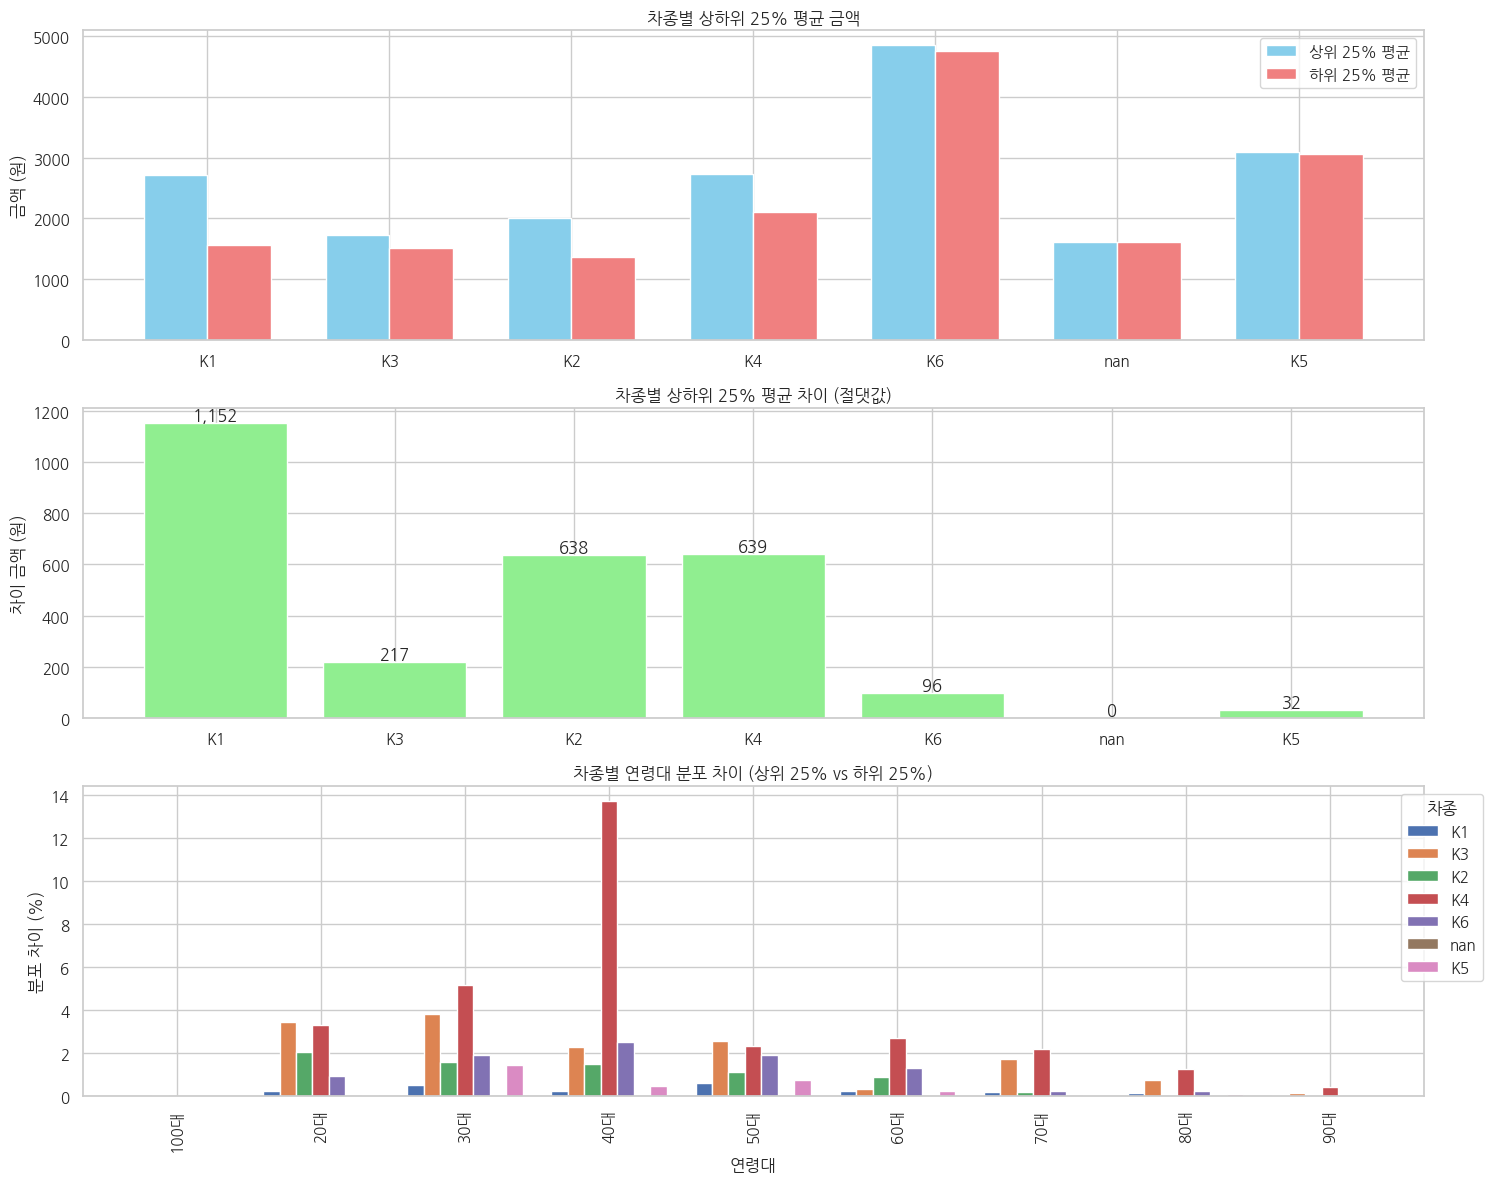


차종별 상하위 25% 통계:

K1 차종:
상위 25% 평균: 2,715.09원
하위 25% 평균: 1,563.29원
차이 (절댓값): 1,151.80원

K3 차종:
상위 25% 평균: 1,731.83원
하위 25% 평균: 1,515.00원
차이 (절댓값): 216.83원

K2 차종:
상위 25% 평균: 2,002.07원
하위 25% 평균: 1,363.60원
차이 (절댓값): 638.47원

K4 차종:
상위 25% 평균: 2,740.83원
하위 25% 평균: 2,101.50원
차이 (절댓값): 639.33원

K6 차종:
상위 25% 평균: 4,857.69원
하위 25% 평균: 4,761.54원
차이 (절댓값): 96.15원

nan 차종:
상위 25% 평균: 1,615.00원
하위 25% 평균: 1,615.00원
차이 (절댓값): 0.00원

K5 차종:
상위 25% 평균: 3,101.33원
하위 25% 평균: 3,068.99원
차이 (절댓값): 32.34원


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 전처리 함수
def get_age_group(age):
    if pd.isna(age) or age == 'Unknown':
        return 'Unknown'
    age = int(float(age))
    return f"{(age//10)*10}대"

# 2. 데이터 처리
rentAcar['product'] = rentAcar['product'].astype(str)
rentAcar['temp_age_group'] = rentAcar['age'].apply(get_age_group)
rentAcar['amount_per_term'] = rentAcar['amount'] / rentAcar['Term']

# 3. 차종별 상하위 25% 차이 분석
results = []
for product in rentAcar['product'].unique():
    product_data = rentAcar[rentAcar['product'] == product]
    
    # Term당 amount 기준으로 상위/하위 25% 구분
    top_25_values = product_data['amount_per_term'][product_data['amount_per_term'] >= product_data['amount_per_term'].quantile(0.75)]
    bottom_25_values = product_data['amount_per_term'][product_data['amount_per_term'] <= product_data['amount_per_term'].quantile(0.25)]
    
    # 상위 25%와 하위 25%의 평균값 차이 계산 (절댓값)
    diff = abs(top_25_values.mean() - bottom_25_values.mean())
    
    results.append({
        'product': product,
        'top_mean': top_25_values.mean(),
        'bottom_mean': bottom_25_values.mean(),
        'difference': diff
    })

# 4. 시각화
plt.figure(figsize=(15, 12))

# 첫 번째 그래프: 차종별 상하위 25% 평균값
ax1 = plt.subplot(3, 1, 1)
df_results = pd.DataFrame(results)
x = np.arange(len(df_results['product']))
width = 0.35

ax1.bar(x - width/2, df_results['top_mean'], width, label='상위 25% 평균', color='skyblue')
ax1.bar(x + width/2, df_results['bottom_mean'], width, label='하위 25% 평균', color='lightcoral')
ax1.set_title('차종별 상하위 25% 평균 금액')
ax1.set_ylabel('금액 (원)')
ax1.set_xticks(x)
ax1.set_xticklabels(df_results['product'])
ax1.legend()

# 두 번째 그래프: 차종별 상하위 25% 차이
ax2 = plt.subplot(3, 1, 2)
ax2.bar(df_results['product'], df_results['difference'], color='lightgreen')
ax2.set_title('차종별 상하위 25% 평균 차이 (절댓값)')
ax2.set_ylabel('차이 금액 (원)')
for i, v in enumerate(df_results['difference']):
    ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# 세 번째 그래프: 연령대별 분포 차이
ax3 = plt.subplot(3, 1, 3)
age_diffs = pd.DataFrame()
for product in rentAcar['product'].unique():
    product_data = rentAcar[rentAcar['product'] == product]
    top_25_age_dist = product_data[product_data['amount_per_term'] >= product_data['amount_per_term'].quantile(0.75)]['temp_age_group'].value_counts(normalize=True) * 100
    bottom_25_age_dist = product_data[product_data['amount_per_term'] <= product_data['amount_per_term'].quantile(0.25)]['temp_age_group'].value_counts(normalize=True) * 100
    
    all_age_groups = pd.Index(sorted(set(top_25_age_dist.index) | set(bottom_25_age_dist.index)))
    top_25_age_dist = top_25_age_dist.reindex(all_age_groups, fill_value=0)
    bottom_25_age_dist = bottom_25_age_dist.reindex(all_age_groups, fill_value=0)
    
    age_diffs[product] = abs(top_25_age_dist - bottom_25_age_dist)

age_diffs = age_diffs[age_diffs.index != 'Unknown']  # Unknown 제외
age_diffs.plot(kind='bar', ax=ax3, width=0.8)
ax3.set_title('차종별 연령대 분포 차이 (상위 25% vs 하위 25%)')
ax3.set_xlabel('연령대')
ax3.set_ylabel('분포 차이 (%)')
ax3.legend(title='차종', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# 5. 상세 통계 출력
print("\n차종별 상하위 25% 통계:")
print("="*70)
for result in results:
    print(f"\n{result['product']} 차종:")
    print(f"상위 25% 평균: {result['top_mean']:,.2f}원")
    print(f"하위 25% 평균: {result['bottom_mean']:,.2f}원")
    print(f"차이 (절댓값): {result['difference']:,.2f}원")


- 차종별 선호도
K1 차종이 압도적으로 높음(75% 상회), 높은 가격을 내야하는 프리미엄 등급의 선택권 또는 선호도가 다소 있는 연령대(40 이후), K1의 가격에 민감하게 반응했다(K1 가격이 비싸면 차라리 높은 단계를 탐) 반대로 20대 이하 고객은 K1의 가격에 민감하게 반응을 안함(아마 대체제가 없기에 그런듯)

- 차종별 가격 격차
K1 차종이 상하위 25% 간 가격 차이가 1,151.80원으로 가장 큰 격차를 보임
반면 K5와 K6 차종은 상하위 25% 간 가격 차이가 각각 32.34원, 96.15원으로 매우 작음
이는 K1의 경우 가격 정책이 매우 유동적인 반면, K5/K6는 상대적으로 균일한 가격 정책을 가지고 있음을 시사

- 가격대별 특성
고가 차종(K5, K6)은 가격 편차가 작고 안정적인 가격대를 형성
저가 차종(K1, K2)은 가격 편차가 크며 다양한 가격대로 운영됨
이는 고가 차종의 경우 프리미엄 정책을, 저가 차종은 탄력적인 가격 정책을 적용하고 있음을 보여줌

- 연령대별 특징
K1, K2 차종은 40대가 주요 이용 연령층
K4, K5, K6와 같은 고가 차종은 30-50대의 중장년층이 고르게 이용
Unknown 카테고리의 비중이 높은 것은 데이터 수집 과정에서 개선이 필요함을 시사

- 마케팅 전략 제안
K1, K2 차종: 가격 탄력성이 높으므로 시즌별/기간별 프로모션 전략이 효과적일 것 (특히, 차의 기종에 대한 적정 가격에 민감하지 않고 렌트하는 비용 자체에 민감한 젊은층을 타겟팅을 하는게 좋아보임)
K4 차종 : 40대에서 충성 고객이 많아보임 가격이 비싸도 타고 싶어하는 사람이 있기에, 그 차종에 대한 특정한 이유가 있는지(디자인, 성능) 살펴보고 그에 맞는 전략을 취해야 할듯
K5, K6 차종: 안정적인 가격대를 유지하면서 프리미엄 서비스 강화 전략 추천

연령대별 타겟팅: 40대를 중심으로 한 마케팅과 30-50대를 아우르는 프리미엄 마케팅 이원화

- 데이터 개선 필요 사항
Unknown 데이터 비중을 줄이기 위한 데이터 수집 체계 개선
차종별 가격 격차의 원인 분석을 위한 추가 데이터 수집 필요
연령대별 선호도와 가격 민감도에 대한 심층 분석 필요